In [11]:
%matplotlib inline

In [12]:
from scipy import signal

In [13]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis import detect_peaks
from kid_readout.analysis.resonator import find_resonators, lmfit_resonator

In [14]:
npd = npy.NumpyDirectory('/data/detectors/2017-02-25_224627_scan.npd/')

In [15]:
sweeps = [npd.read(name) for name in npd.node_names() if name.startswith('SweepArray')]
snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [16]:
[(snap.x.ptp(), snap.y.ptp()) for snap in snaps]

[(139.0, 137.0),
 (151.0, 130.0),
 (163.0, 141.0),
 (173.0, 171.0),
 (167.0, 156.0),
 (152.0, 140.0),
 (145.0, 136.0),
 (136.0, 150.0),
 (135.0, 157.0),
 (132.0, 169.0),
 (131.0, 180.0),
 (125.0, 158.0),
 (127.0, 147.0),
 (135.0, 135.0),
 (146.0, 133.0),
 (142.0, 132.0),
 (137.0, 109.0),
 (122.0, 96.0),
 (114.0, 97.0),
 (107.0, 92.0),
 (109.0, 119.0),
 (111.0, 128.0),
 (105.0, 131.0),
 (99.0, 131.0),
 (95.0, 127.0),
 (87.0, 116.0),
 (85.0, 106.0),
 (94.0, 110.0)]

In [17]:
def remove_background(f, s21, amp_degree=4, phi_degree=4, weights=None):
    if weights is None:
        weights = np.abs(s21)**2
    amp_poly = np.polyfit(f, np.abs(s21), deg=amp_degree, w=weights)
    phi_poly = np.polyfit(f, np.unwrap(np.angle(s21)), deg=phi_degree, w=weights)
    return s21 / (np.polyval(amp_poly, f) * np.exp(1j * np.polyval(phi_poly, f)))

# Raw data

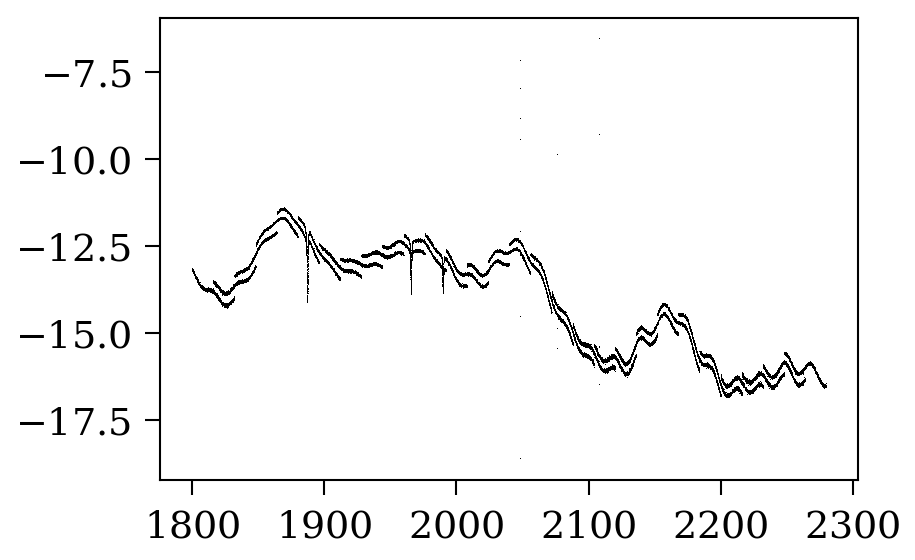

In [18]:
fig, ax = plt.subplots()
for sa in sweeps:
    ax.plot(sa.frequency_MHz, 20 * np.log10(np.abs(sa.s21_point)), ',k')